In [56]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas(position=0, leave=True)

C:\Users\rfrep\anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [57]:
## Удаление выбрасов по 3-ему квантилю
def del_emissions(x, mean, std):
    if np.abs(x-mean)/std < 3:
        return x
    return None

#### В данной задаче вам предстоит обучить модель для предсказания победы в футбольном матче (поле win_team).

#### В наборе данных представлены основные характеристики матча:

#### id игроков обеих команд
#### ставки различных букмекерских контор на победу домашней команды
#### год проведения матча
#### Помимо этого имеется файл с игровыми характеристиками каждого игрока.

### Загрузка данных

In [73]:
df_play = pd.read_csv('data/players.csv')
df_play = df_play.drop_duplicates()

In [74]:
df = pd.read_csv('data/data.csv')
df = df.drop_duplicates()

In [75]:
df_play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183977 entries, 0 to 183977
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_api_id        183977 non-null  int64  
 1   date                 183977 non-null  object 
 2   overall_rating       183142 non-null  float64
 3   potential            183142 non-null  float64
 4   preferred_foot       183142 non-null  object 
 5   attacking_work_rate  180748 non-null  object 
 6   defensive_work_rate  183142 non-null  object 
 7   crossing             183142 non-null  float64
 8   finishing            183142 non-null  float64
 9   heading_accuracy     183142 non-null  float64
 10  short_passing        183142 non-null  float64
 11  volleys              181265 non-null  float64
 12  dribbling            183142 non-null  float64
 13  curve                181265 non-null  float64
 14  free_kick_accuracy   183142 non-null  float64
 15  long_passing     

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8786 entries, 0 to 8785
Data columns (total 55 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8786 non-null   int64  
 1   home_player_1   8786 non-null   int64  
 2   home_player_2   8786 non-null   int64  
 3   home_player_3   8786 non-null   int64  
 4   home_player_4   8786 non-null   int64  
 5   home_player_5   8786 non-null   int64  
 6   home_player_6   8786 non-null   int64  
 7   home_player_7   8786 non-null   int64  
 8   home_player_8   8786 non-null   int64  
 9   home_player_9   8786 non-null   int64  
 10  home_player_10  8786 non-null   int64  
 11  home_player_11  8786 non-null   int64  
 12  away_player_1   8786 non-null   int64  
 13  away_player_2   8786 non-null   int64  
 14  away_player_3   8786 non-null   int64  
 15  away_player_4   8786 non-null   int64  
 16  away_player_5   8786 non-null   int64  
 17  away_player_6   8786 non-null   i

### Анализ данных и Предобработка данных 

#### players.csv

In [77]:
df_play.date = pd.to_datetime(df_play.date)

In [78]:
## Так как значения в defensive_work_rate и attacking_work_rate являются порядковыми, заменяем их на 0,1,2 

df_play.defensive_work_rate = df_play.defensive_work_rate.map({'low': 0, '_0':0, 'o':0, '0':0, '1':0, '2':0, '3':0,
                                                                 'medium':1,  '4':1, '5':1, '6':1,
                                                                 'high':2, '7':2, '8':2, '9':2,
                                                                 'es': None, 'ean': None, 'tocky':None, 'ormal':None # неизвестно, что могут означать эти значения
                                                                })

df_play.attacking_work_rate = df_play.attacking_work_rate.map({'low': 0,
                                 'medium':1,
                                 'high':2, 
                                 'None': None,'y': None,'le': None, 'stoc':None,'norm':None  # неизвестно, что могут означать эти значения
                                })

In [79]:
df_play.preferred_foot.value_counts()

right    138409
left      44733
Name: preferred_foot, dtype: int64

In [80]:
### Категориальный признак preferred_foot (OHE)
df_play['preferred_foot_right'] = df_play.preferred_foot.apply(lambda x: 1 if x=='right' else 0)
df_play['preferred_foot_left'] = df_play.preferred_foot.apply(lambda x: 1 if x=='left' else 0)
del df_play['preferred_foot']

In [81]:
df_play.columns

Index(['player_api_id', 'date', 'overall_rating', 'potential',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'preferred_foot_right',
       'preferred_foot_left'],
      dtype='object')

In [82]:
df_play['year'] = df_play.date.apply(lambda x: x.year)

C:\Users\rfrep\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\rfrep\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


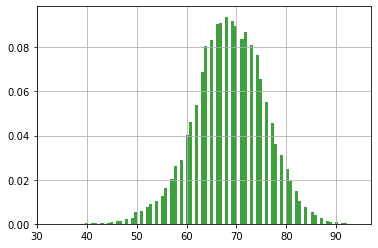

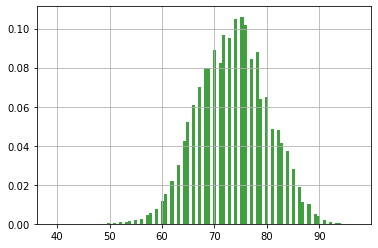

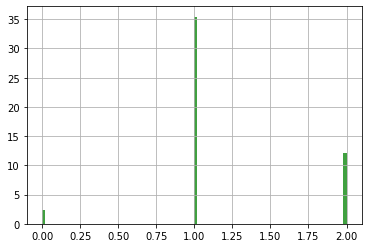

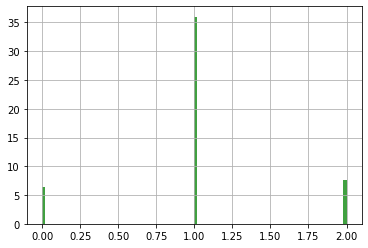

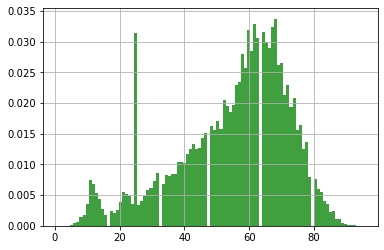

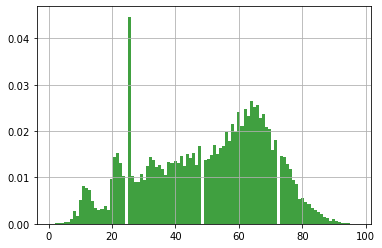

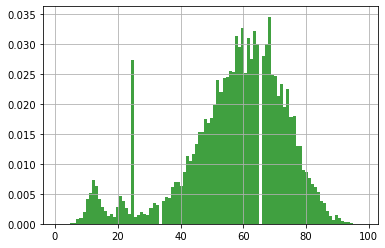

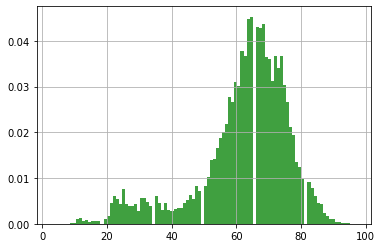

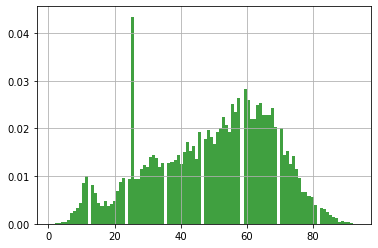

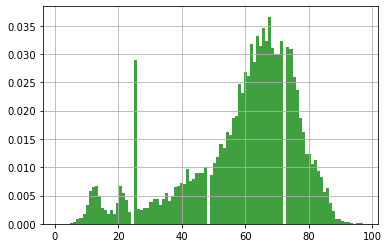

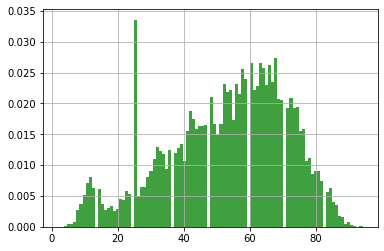

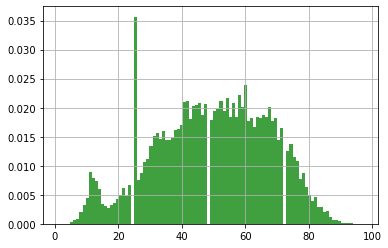

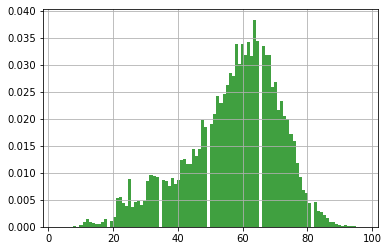

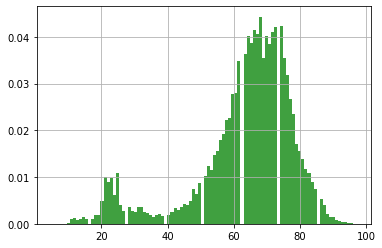

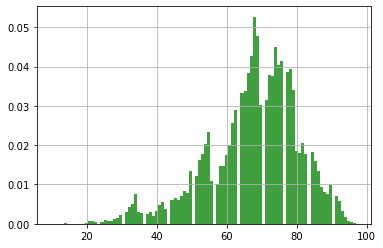

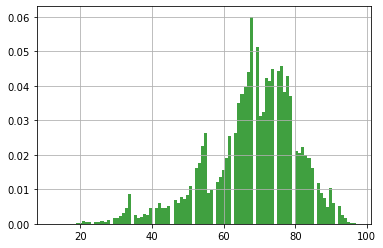

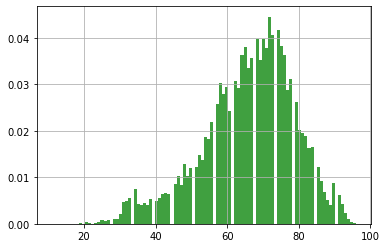

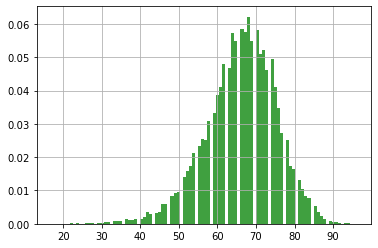

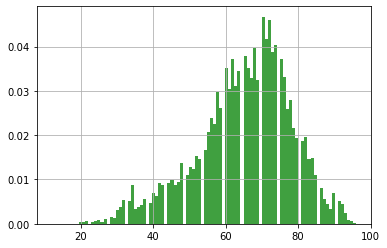

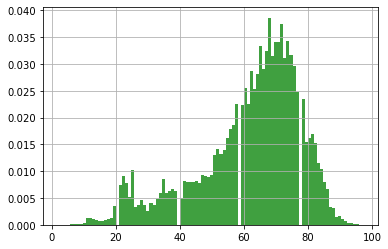

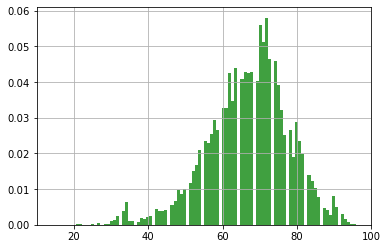

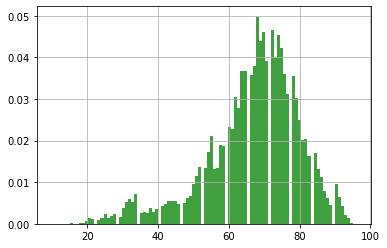

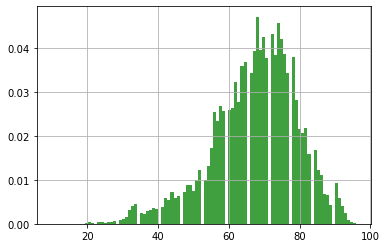

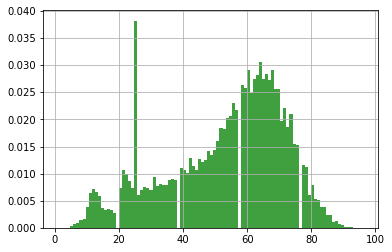

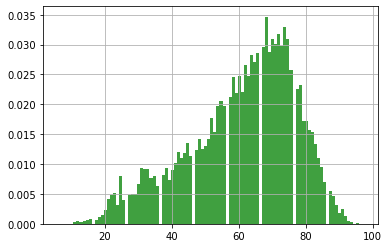

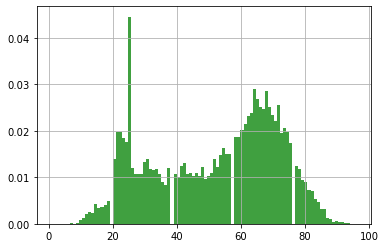

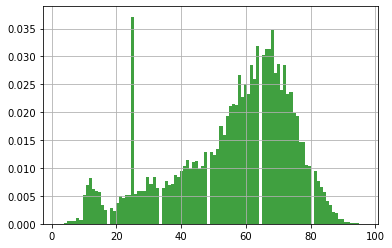

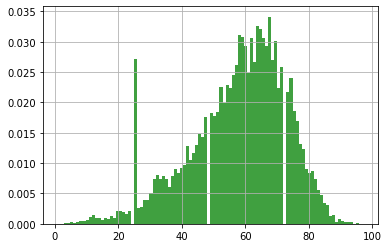

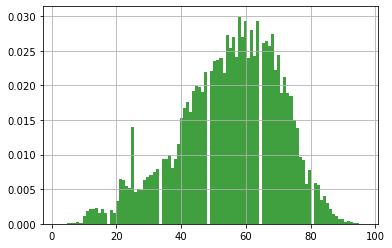

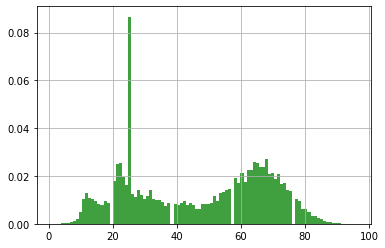

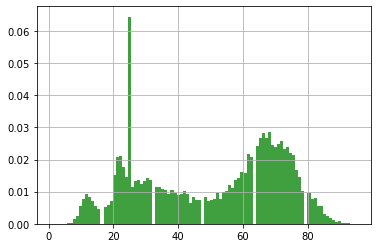

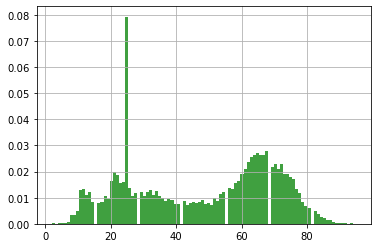

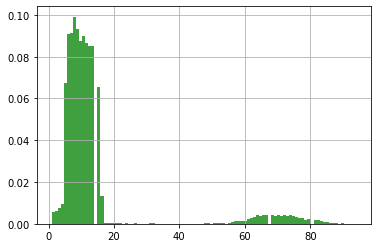

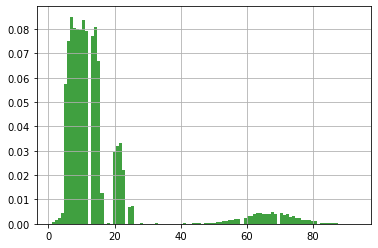

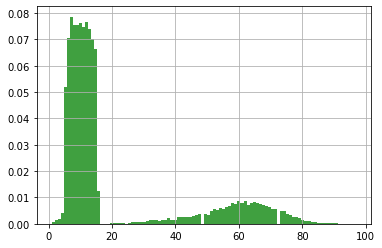

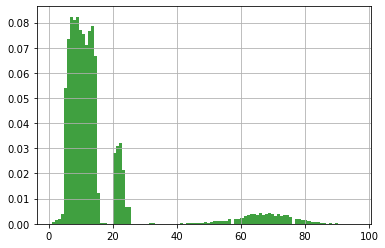

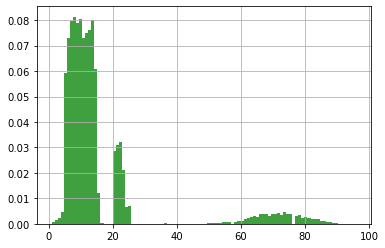

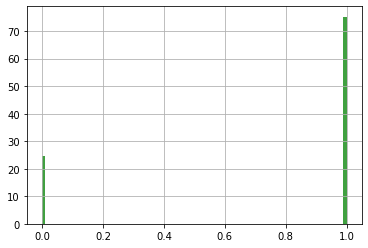

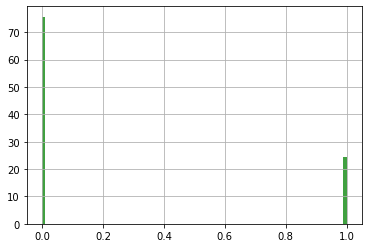

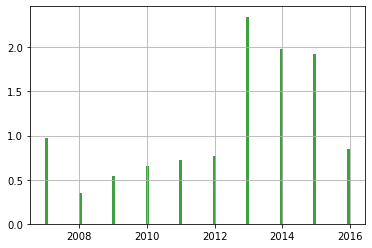

In [83]:
### Графики 

for i in df_play.columns[2:]: 
    ### Распределения признаков
    n, bins, patches = plt.hist(df_play[i], 100, density=True, facecolor='g', alpha=0.75 )
    plt.grid(True)
    plt.show()

In [84]:
## Заполнение пустых значений
columns_int = ['overall_rating', 'potential',
   'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
   'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
   'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
   'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
   'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
   'interceptions', 'positioning', 'vision', 'penalties', 'marking',
   'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
   'gk_kicking', 'gk_positioning', 'gk_reflexes']

colums_category = ['preferred_foot_right', 'preferred_foot_left', 'preferred_foot']

print(df_play.isna().any())


player_api_id           False
date                    False
overall_rating           True
potential                True
attacking_work_rate      True
defensive_work_rate      True
crossing                 True
finishing                True
heading_accuracy         True
short_passing            True
volleys                  True
dribbling                True
curve                    True
free_kick_accuracy       True
long_passing             True
ball_control             True
acceleration             True
sprint_speed             True
agility                  True
reactions                True
balance                  True
shot_power               True
jumping                  True
stamina                  True
strength                 True
long_shots               True
aggression               True
interceptions            True
positioning              True
vision                   True
penalties                True
marking                  True
standing_tackle          True
sliding_ta

In [85]:

### Замены пустых значений признаков предшествующими значениями

df_play = df_play.sort_values(['player_api_id'])
group = df_play.groupby('player_api_id')

In [90]:
df_play_cl = pd.DataFrame()
for player in tqdm(df_play.player_api_id.unique()):
    df_play_cl = df_play_cl.append(group.get_group(player).fillna(method='ffill'))

100%|████████████████████████████████████████████████████████████████████████████| 11060/11060 [06:31<00:00, 28.28it/s]


In [92]:
df_play_cl

,player_api_id,date,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_right,preferred_foot_left,year
8085,750584,2016-05-19,58.0,66.0,1.0,1.0,47.0,39.0,53.0,60.0,...,66.0,62.0,8.0,9.0,13.0,11.0,13.0,1,0,2016
8086,750584,2007-02-22,58.0,66.0,1.0,1.0,47.0,39.0,53.0,60.0,...,66.0,62.0,8.0,9.0,13.0,11.0,13.0,1,0,2007
147412,750435,2015-02-27,56.0,70.0,1.0,0.0,35.0,57.0,55.0,60.0,...,19.0,21.0,9.0,10.0,8.0,10.0,11.0,1,0,2015
147408,750435,2016-04-14,60.0,74.0,1.0,0.0,35.0,57.0,55.0,60.0,...,19.0,21.0,9.0,10.0,8.0,10.0,11.0,1,0,2016
147410,750435,2016-02-04,56.0,70.0,1.0,0.0,35.0,57.0,55.0,60.0,...,19.0,21.0,9.0,10.0,8.0,10.0,11.0,1,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139847,2625,2013-03-08,61.0,61.0,1.0,1.0,50.0,47.0,46.0,52.0,...,63.0,54.0,12.0,11.0,6.0,8.0,8.0,1,0,2013
139846,2625,2013-06-07,61.0,61.0,1.0,1.0,50.0,47.0,46.0,52.0,...,63.0,54.0,12.0,11.0,6.0,8.0,8.0,1,0,2013
139845,2625,2014-09-18,61.0,61.0,1.0,1.0,50.0,47.0,46.0,52.0,...,63.0,54.0,12.0,11.0,6.0,8.0,8.0,1,0,2014
139844,2625,2014-11-07,61.0,61.0,1.0,1.0,50.0,47.0,46.0,52.0,...,63.0,54.0,12.0,11.0,6.0,8.0,8.0,1,0,2014


In [93]:
df_play_cl = df_play_cl.sort_values('player_api_id', ascending=False)
group = df_play_cl.groupby('player_api_id')
df_play = pd.DataFrame()
for player in tqdm(df_play_cl.player_api_id.unique()):
    df_play = df_play.append(group.get_group(player).fillna(method='ffill'))

100%|████████████████████████████████████████████████████████████████████████████| 11060/11060 [06:40<00:00, 27.64it/s]


In [101]:
### Удаление записей где все значения пустые
df_play = df_play[~(df_play[np.append(['player_api_id'], columns_int)].set_index('player_api_id').isnull()).all(1).values]

In [103]:
# print(df_play.isna().any())


In [104]:
### У игроков с полностью пустыми признаками заменяем эти признакт на средние значения по датасету. Таких всего 478
all_null_columns = []
for i in range(df_play.isna().any().shape[0]):
    if df_play.isna().any()[i]:
        all_null_columns.append(df_play.isna().any().index[i])
        
for col in tqdm(all_null_columns):
    df_play[col].fillna(round(df_play[col].mean()),inplace=True)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 821.36it/s]


In [105]:
# print(df_play.isna().any())

player_api_id           False
date                    False
overall_rating          False
potential               False
attacking_work_rate     False
defensive_work_rate     False
crossing                False
finishing               False
heading_accuracy        False
short_passing           False
volleys                 False
dribbling               False
curve                   False
free_kick_accuracy      False
long_passing            False
ball_control            False
acceleration            False
sprint_speed            False
agility                 False
reactions               False
balance                 False
shot_power              False
jumping                 False
stamina                 False
strength                False
long_shots              False
aggression              False
interceptions           False
positioning             False
vision                  False
penalties               False
marking                 False
standing_tackle         False
sliding_ta

<ipython-input-106-f3f2ec535f59>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots()
<ipython-input-106-f3f2ec535f59>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots()
<ipython-input-106-f3f2ec535f59>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplo

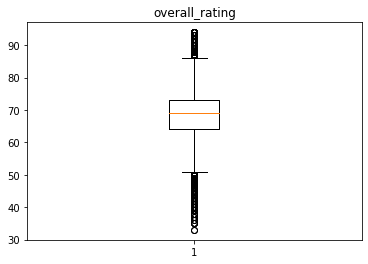

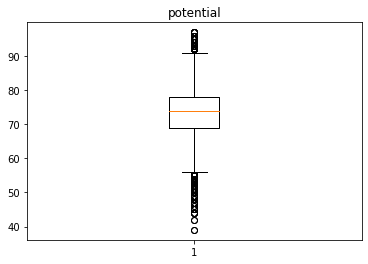

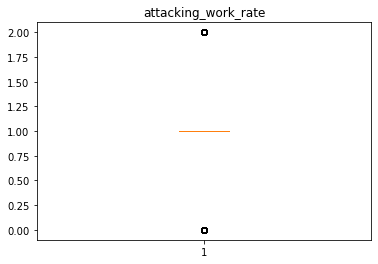

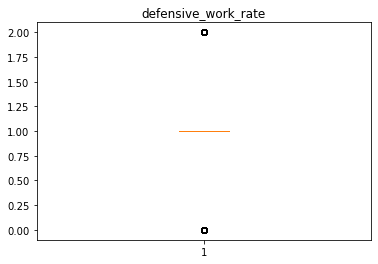

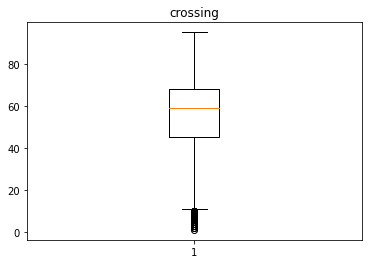

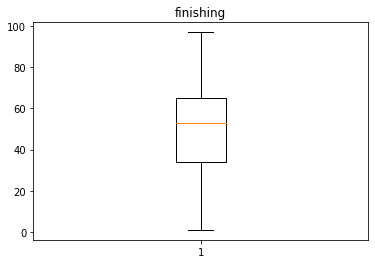

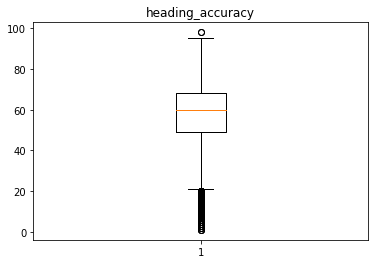

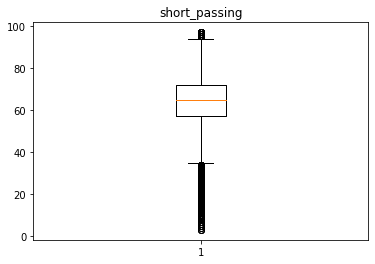

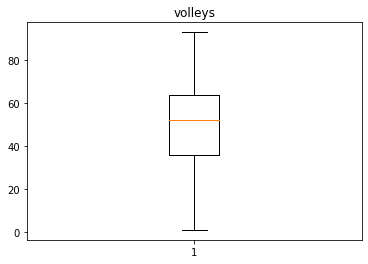

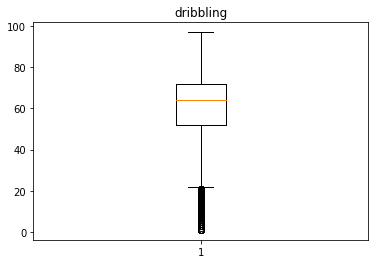

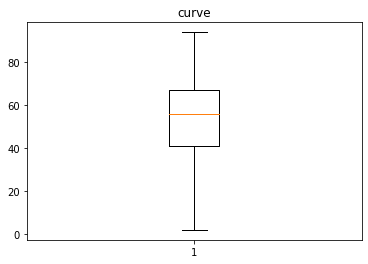

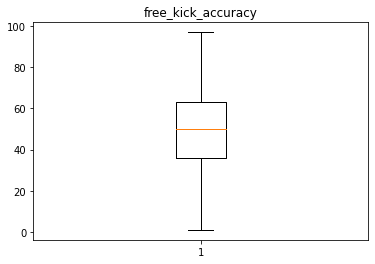

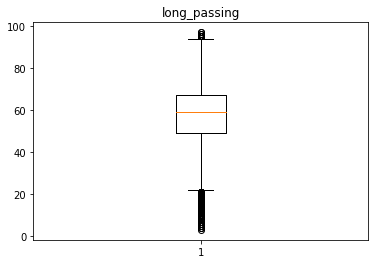

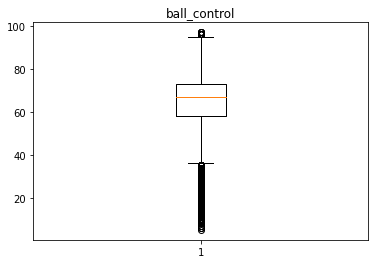

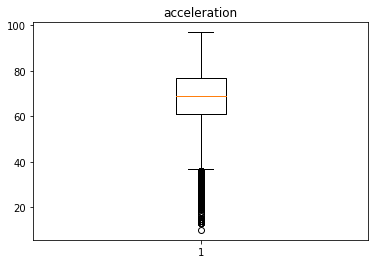

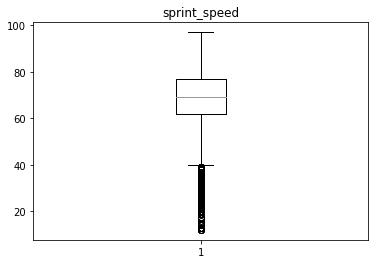

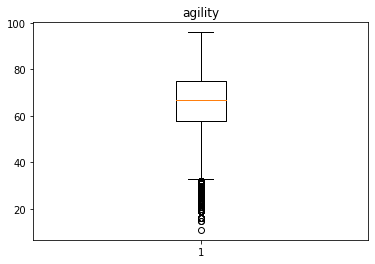

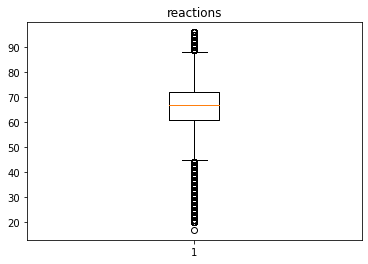

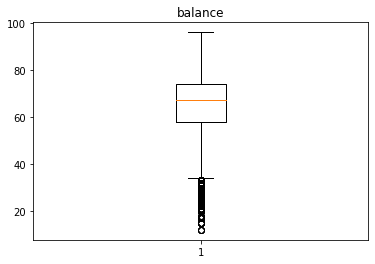

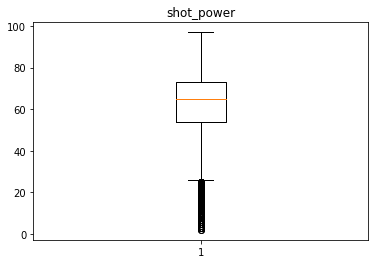

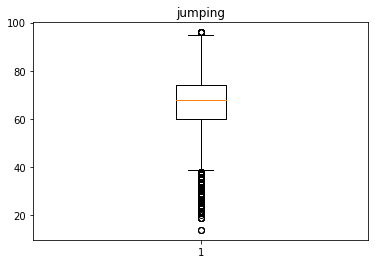

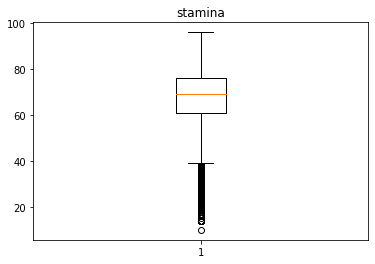

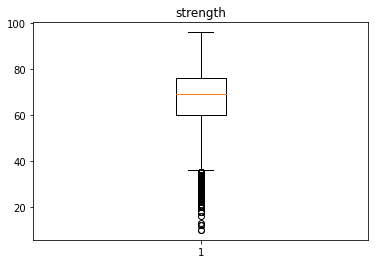

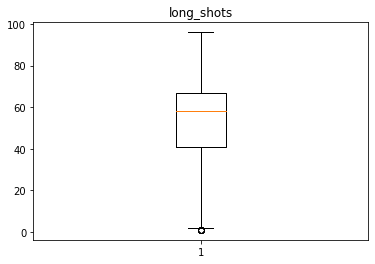

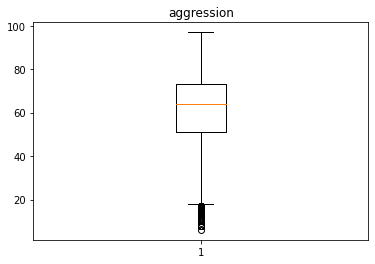

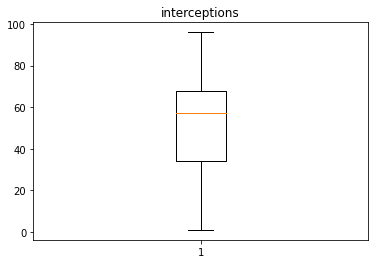

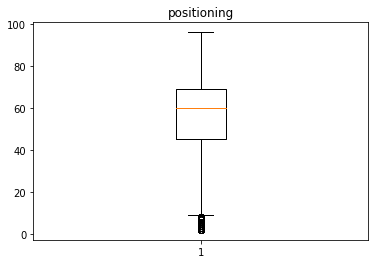

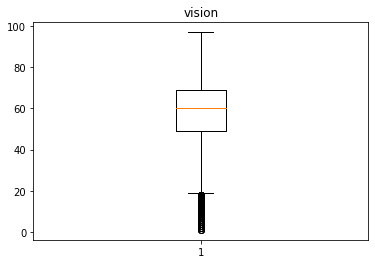

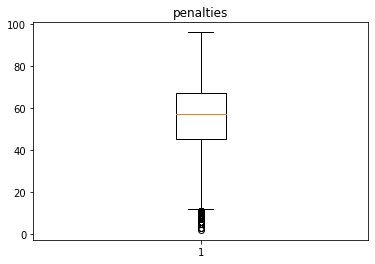

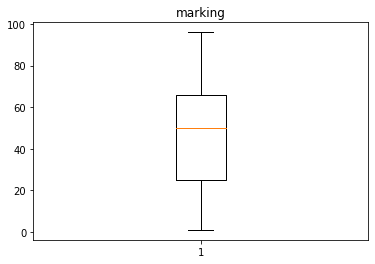

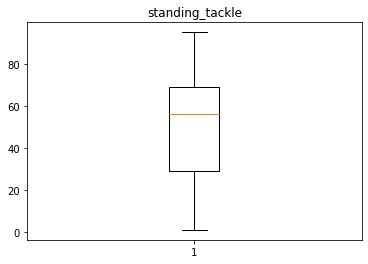

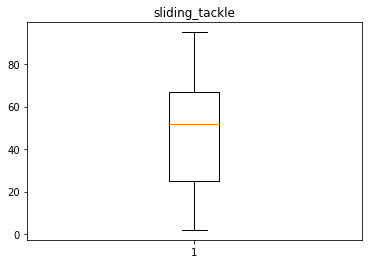

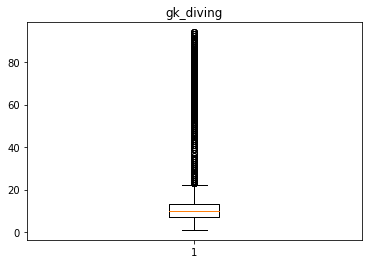

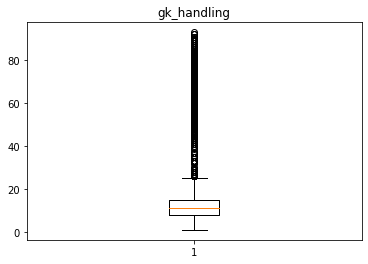

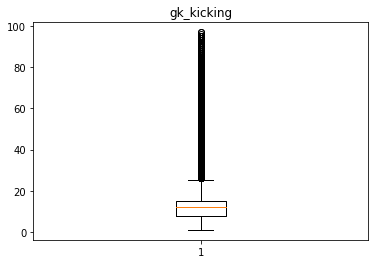

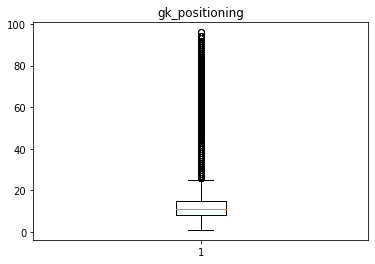

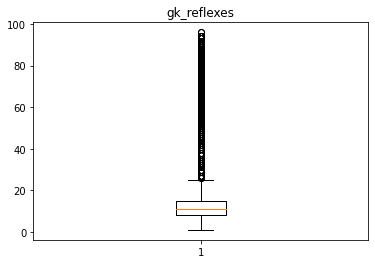

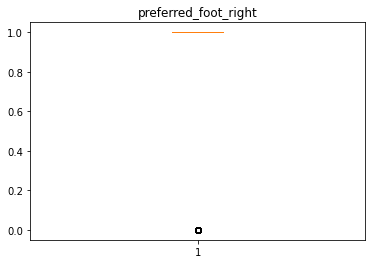

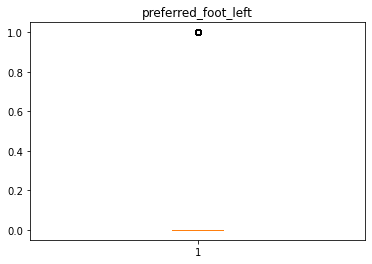

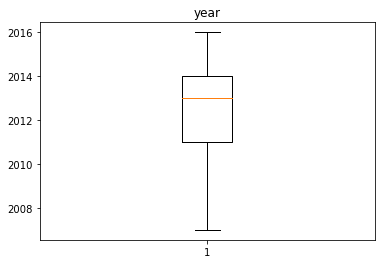

In [106]:
### Графики 

for i in df_play.columns[2:]:
    
    ### Распределения признаков
#     n, bins, patches = plt.hist(df_play[i], 100, density=True, facecolor='g', alpha=0.75 )
#     plt.grid(True)
#     plt.show()

    ## Поиск выбрасов
    fig1, ax1 = plt.subplots()
    ax1.boxplot(df_play[i])
    ax1.set_title(i)

In [107]:
### Удаление выбрасов
for col in tqdm(df_play.columns[2:]):
    mean = df_play[col].mean()
    std = df_play[col].std()
    df_play[col] = df_play[col].apply(lambda x: del_emissions(x,mean,std))

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:12<00:00,  3.11it/s]


In [109]:

### Замены пустых значений признаков предшествующими значениями

df_play = df_play.sort_values(['player_api_id'])
group = df_play.groupby('player_api_id')

In [110]:
df_play_cl = pd.DataFrame()
for player in tqdm(df_play.player_api_id.unique()):
    df_play_cl = df_play_cl.append(group.get_group(player).fillna(method='ffill'))

100%|████████████████████████████████████████████████████████████████████████████| 11060/11060 [06:36<00:00, 27.89it/s]


In [111]:
df_play_cl = df_play_cl.sort_values('player_api_id', ascending=False)
group = df_play_cl.groupby('player_api_id')
df_play = pd.DataFrame()
for player in tqdm(df_play_cl.player_api_id.unique()):
    df_play = df_play.append(group.get_group(player).fillna(method='ffill'))

100%|████████████████████████████████████████████████████████████████████████████| 11060/11060 [05:56<00:00, 31.03it/s]


In [112]:
### Удаление записей где все значения пустые
df_play = df_play[~(df_play[np.append(['player_api_id'], columns_int)].set_index('player_api_id').isnull()).all(1).values]

In [113]:
# print(df_play.isna().any())


In [124]:
all_null_columns = []
for i in range(df_play.isna().any().shape[0]):
    if df_play.isna().any()[i]:
        all_null_columns.append(df_play.isna().any().index[i])

In [126]:
### У игроков с полностью пустыми признаками заменяем эти признакт на средние значения по датасету. Таких всего 478
all_null_columns = []
for i in range(df_play.isna().any().shape[0]):
    if df_play.isna().any()[i]:
        all_null_columns.append(df_play.isna().any().index[i])
        
for col in tqdm(all_null_columns):
    df_play[col].fillna(round(df_play[col].mean()),inplace=True)

100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 821.96it/s]


In [129]:
df_play.to_csv('data/player_cl.csv', index=False)

In [ ]:
### Объединение players с основным датасетом 

In [ ]:
#### В каждой команде по 10 человек и у одного человека по 37 признаков описывающих его. 
#### Также есть информация о коэффициентах букмекеров, то еще 30 признаков. 
#### Получается для одной записи 37*20+30 =770 признаков для одной записи. ,
#### Всего 8К записей, поэтому просто вынести показатели всех игроков для описания одного матча нельзя, слишком много признаков и мало примеров.
#### Для того чтобы уменьшить размерность возьмем средние показатели характеристик игроков для каждой команды  

In [228]:
#### У матчей нет конкретной даты проведения, поэтому показатели игроков нужно усреднить в рамках одного года
group = df_play.groupby(['player_api_id', 'year']).mean()
df_p_g = pd.DataFrame()

df_p_g['player_api_id'] = group.index.get_level_values(0)
df_p_g['year'] = group.index.get_level_values(1)

for col in group.columns:
    df_p_g[col] = group[col].values

In [229]:
#### Получение среднего значения признаков всех игроков в рамках команд для конкретной игры

#### Формирование списка игроков с привязкой к команде и игре
df_match = pd.DataFrame()

## Домашние команды 
for col in  tqdm([ 'home_player_1', 'home_player_2', 'home_player_3', 'home_player_4',
           'home_player_5', 'home_player_6', 'home_player_7','home_player_8', 
           'home_player_9', 'home_player_10', 'home_player_11']):
    
    df_buffer = df[[col,'id', 'year', 

                   ]]
    df_buffer.rename(columns={col:'player_api_id'}, inplace=True)
    df_buffer['home_team'] = [1]*df_buffer.shape[0]
    df_match = df_match.append(df_buffer)

## Команды гостей 
for col in  tqdm([ 'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4',
       'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8',
       'away_player_9', 'away_player_10', 'away_player_11']):
    
    df_buffer = df[[col,'id', 'year', 
#                     'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA',
#        'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH',
#        'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD',
#        'BSA', 'win_team'
                   ]]
    df_buffer.rename(columns={col:'player_api_id'}, inplace=True)
    df_buffer['home_team'] = [0]*df_buffer.shape[0]
    df_match = df_match.append(df_buffer)
    
df_match = df_match.drop_duplicates()

  0%|                                                                                           | 0/11 [00:00<?, ?it/s]C:\Users\rfrep\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-229-f7d001e193fe>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buffer['home_team'] = [1]*df_buffer.shape[0]
  0%|                                                                                           | 0/11 [00:00<?, ?it/s]<ipython-input-229-f7d001e193fe>:30: SettingWithCopyWarning: 

In [230]:
### Получение средних показателей команды для каждой игры
df_p_g = pd.merge(df_p_g, df_match, on=['player_api_id', 'year'])
df_p_g = df_p_g[df_p_g.columns[2:]].groupby(['id', 'home_team']).mean()
df_p_g['id'] = df_p_g.index.get_level_values(0)
df_p_g['home_team'] = df_p_g.index.get_level_values(1)

df_p_g.index = [0]*df_p_g.shape[0]
df_p_g = pd.merge(df_p_g[df_p_g.home_team==1], df_p_g[df_p_g.home_team==0], on='id')
del df_p_g['home_team_x']
del df_p_g['home_team_y']

### Добавление коэффициентов букмекеров и таргета

columns = ['id', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA',
       'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH',
       'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD',
       'BSA', 'win_team']

df_p_g = pd.merge(df_p_g, df[columns], on='id')

<ipython-input-254-aa37e0943e08>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots()
<ipython-input-254-aa37e0943e08>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots()
<ipython-input-254-aa37e0943e08>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = plt.subplots(

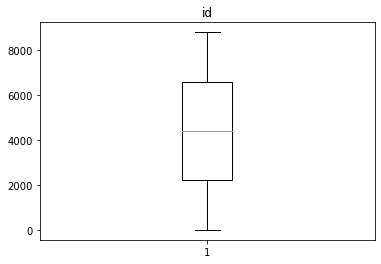

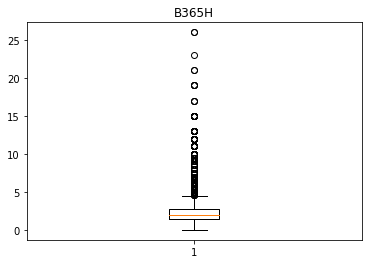

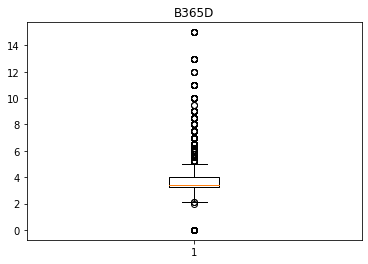

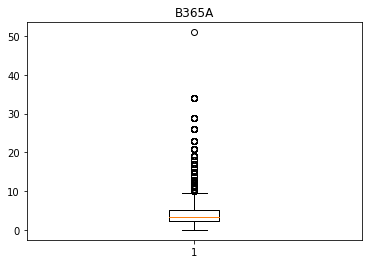

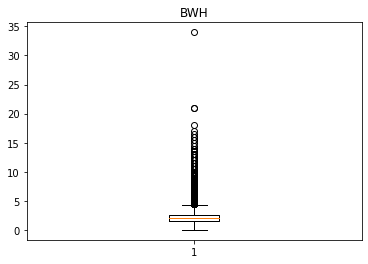

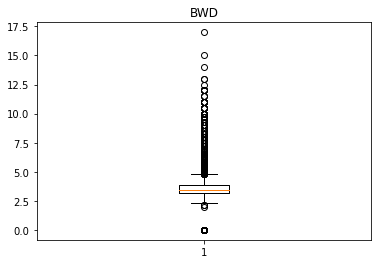

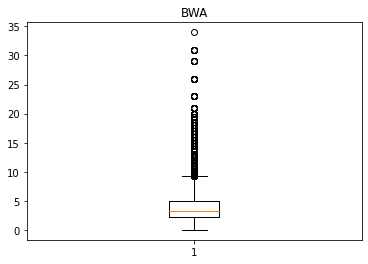

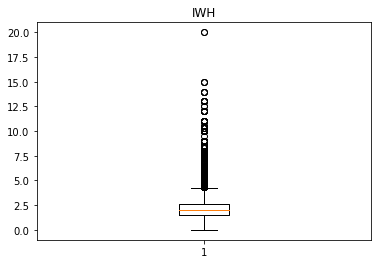

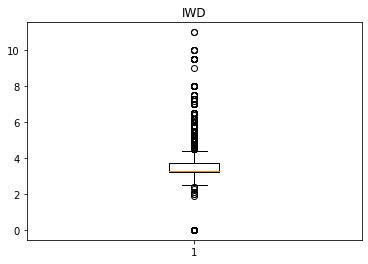

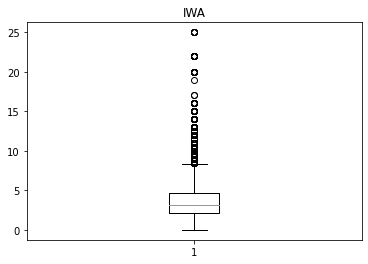

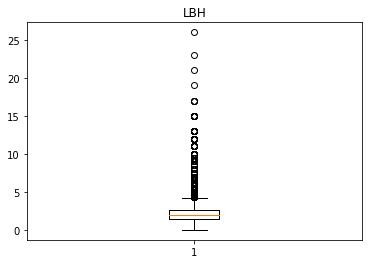

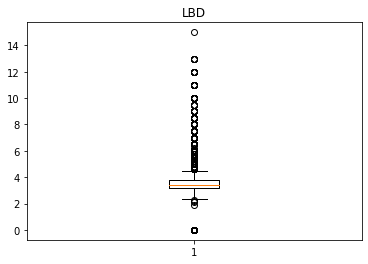

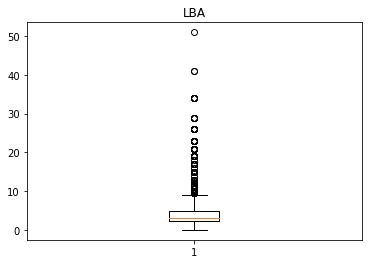

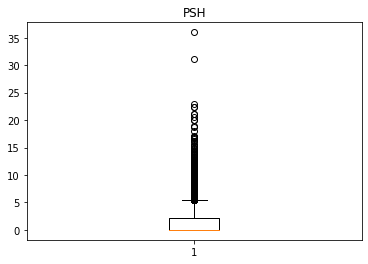

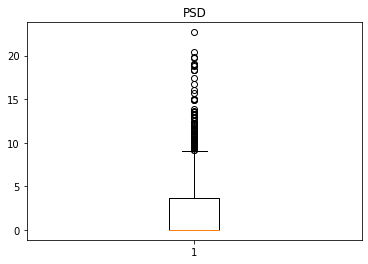

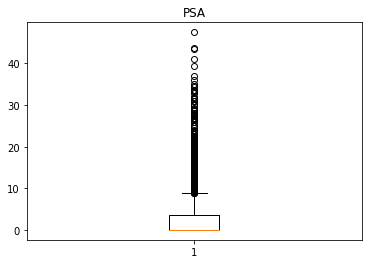

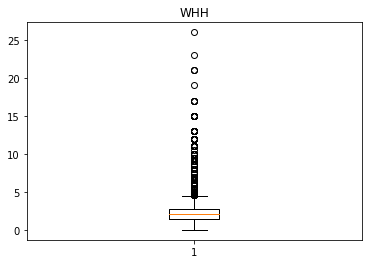

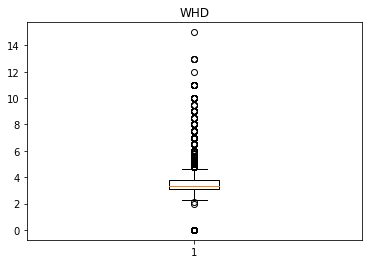

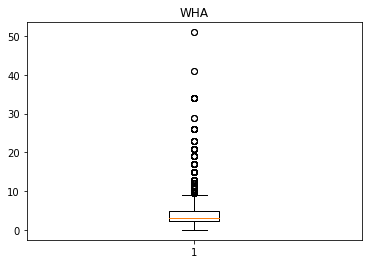

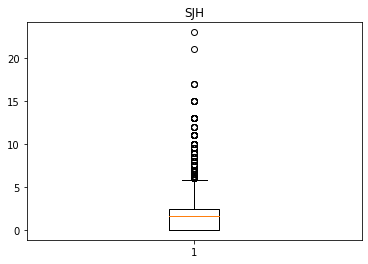

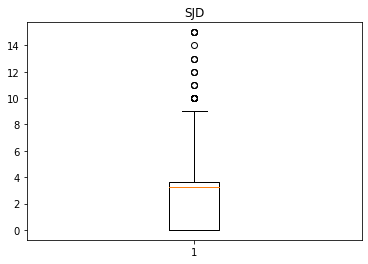

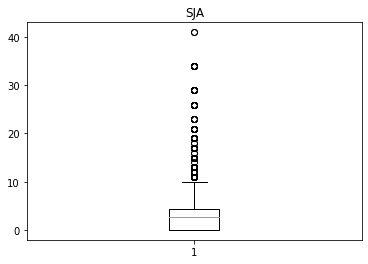

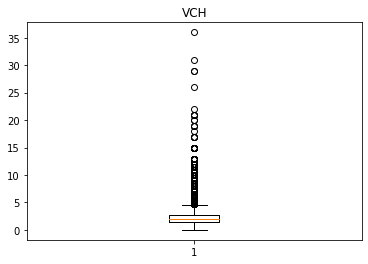

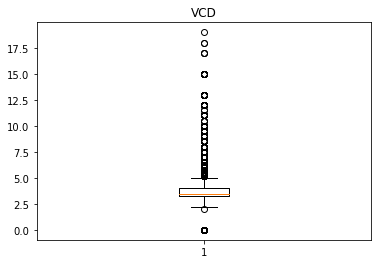

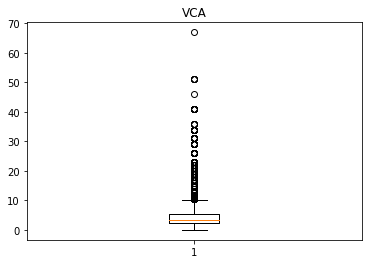

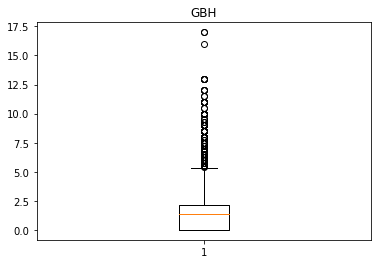

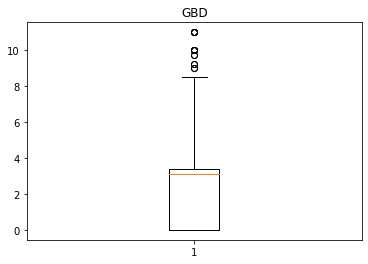

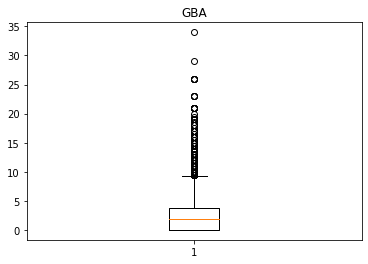

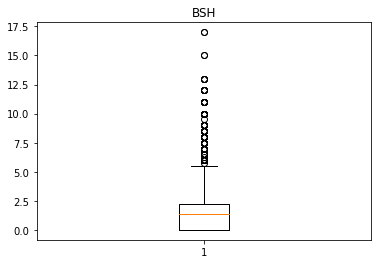

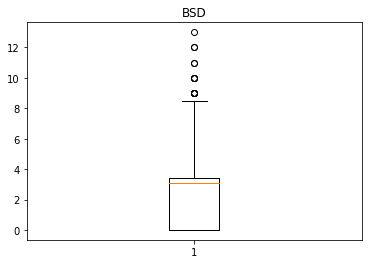

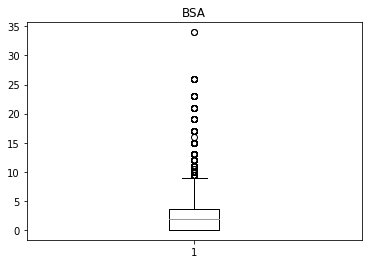

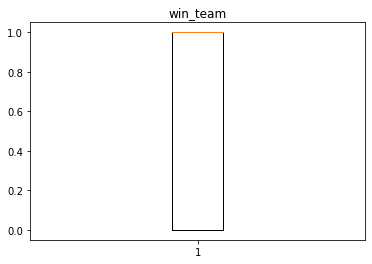

In [254]:
for i in columns:
    
    ### Распределения признаков
#     n, bins, patches = plt.hist(df_p_g[i], 100, density=True, facecolor='g', alpha=0.75 )
#     plt.grid(True)
#     plt.show()

    ## Поиск выбрасов
    fig1, ax1 = plt.subplots()
    ax1.boxplot(df_p_g[i])
    ax1.set_title(i)

In [255]:
### Нужно убрать выбросы у коэффицентов букмекеров 
for col in tqdm(columns[1:-1]):
    mean = df_p_g[col].mean()
    std = df_p_g[col].std()
    df_p_g[col] = df_p_g[col].apply(lambda x: del_emissions(x,mean,std))

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 60.52it/s]


In [287]:
### Замена пустых значений на медианные значения всех коэффициентам на конкретных матч. Заменяем не на среднии так как есть противоречивые коэффициенты у разных букмекеров, поэтому лучше присоединятся к большинству
df_p_g['buk_median'] = df_p_g[columns[1:-1]].progress_apply(lambda x: x.median(), axis=1)

for col in tqdm(columns[1:-1]):
    df_p_g[col] = df_p_g[[col,'buk_median']].apply(lambda x: x[1] if str(x[0])=='nan' else x, axis=1 )

In [306]:
del df_p_g['buk_median']

In [312]:
df_p_g.index=df_p_g.id

In [313]:
del df_p_g['id']

In [ ]:
#### Поиск корреляций между признаками 

In [314]:
df_p_g.columns[:60]

Index(['overall_rating_x', 'potential_x', 'attacking_work_rate_x',
       'defensive_work_rate_x', 'crossing_x', 'finishing_x',
       'heading_accuracy_x', 'short_passing_x', 'volleys_x', 'dribbling_x',
       'curve_x', 'free_kick_accuracy_x', 'long_passing_x', 'ball_control_x',
       'acceleration_x', 'sprint_speed_x', 'agility_x', 'reactions_x',
       'balance_x', 'shot_power_x', 'jumping_x', 'stamina_x', 'strength_x',
       'long_shots_x', 'aggression_x', 'interceptions_x', 'positioning_x',
       'vision_x', 'penalties_x', 'marking_x', 'standing_tackle_x',
       'sliding_tackle_x', 'gk_diving_x', 'gk_handling_x', 'gk_kicking_x',
       'gk_positioning_x', 'gk_reflexes_x', 'preferred_foot_right_x',
       'preferred_foot_left_x', 'overall_rating_y', 'potential_y',
       'attacking_work_rate_y', 'defensive_work_rate_y', 'crossing_y',
       'finishing_y', 'heading_accuracy_y', 'short_passing_y', 'volleys_y',
       'dribbling_y', 'curve_y', 'free_kick_accuracy_y', 'long_passin

In [315]:
df_p_g.columns[60:110]

Index(['stamina_y', 'strength_y', 'long_shots_y', 'aggression_y',
       'interceptions_y', 'positioning_y', 'vision_y', 'penalties_y',
       'marking_y', 'standing_tackle_y', 'sliding_tackle_y', 'gk_diving_y',
       'gk_handling_y', 'gk_kicking_y', 'gk_positioning_y', 'gk_reflexes_y',
       'preferred_foot_right_y', 'preferred_foot_left_y', 'B365H', 'B365D',
       'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
       'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'win_team'],
      dtype='object')

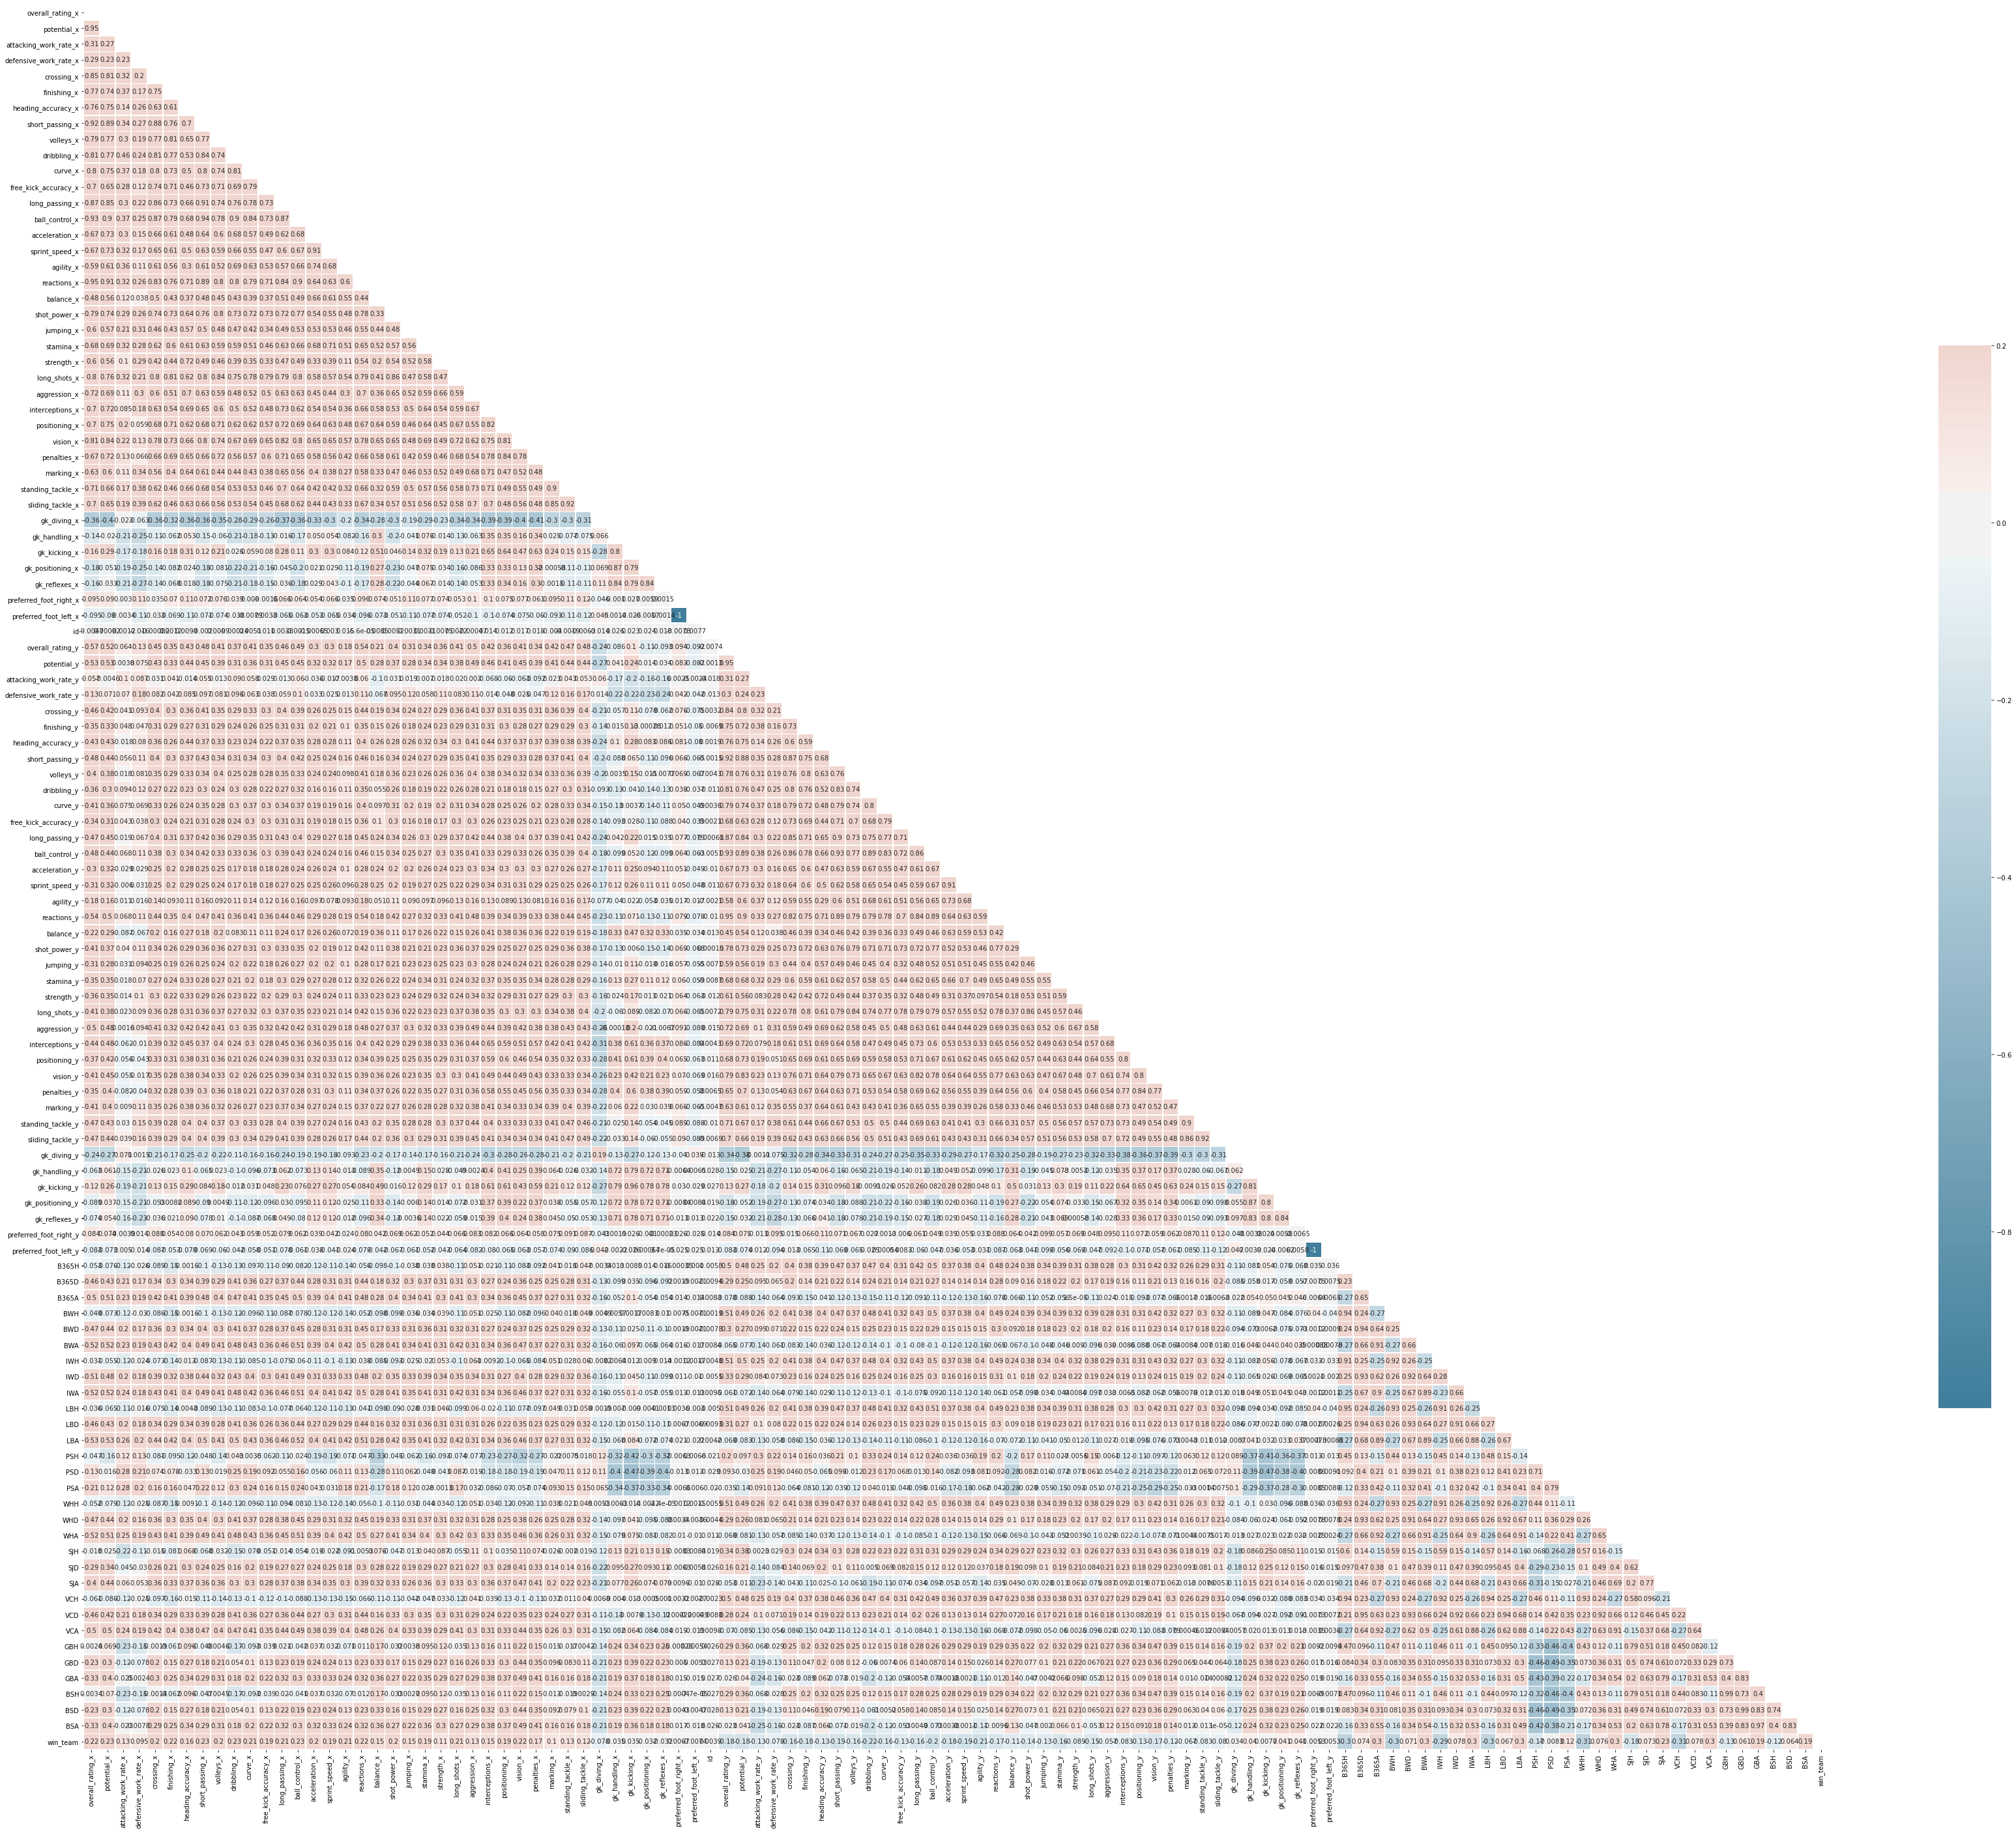

In [309]:
from string import ascii_letters
import seaborn as sns


### Есть признаки сильно коррелирующие между собой
### Больше всего с остальными признаками коррелирует overall_rating. Это можно обяснить тем, что данный признак характеризует всю команду в целом. 
### Также есть предсказуемая обратная корреляция между признаками preferred_foot_right','preferred_foot_left'.
### 


# Compute the correlation matrix
corr = df_p_g.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(60, 60))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.2, center=0, annot=True, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

fig = ax.get_figure()
fig.savefig('corr_m.png')

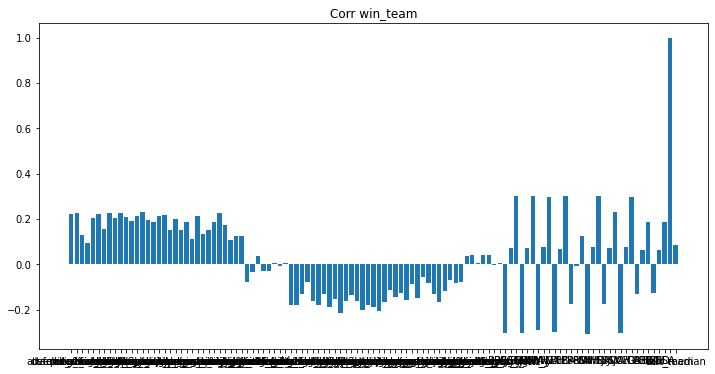

In [305]:
### Признаков с сильной корреляций с таргетом нет

fig, ax = plt.subplots()

ax.bar(corr['win_team'].index, corr['win_team'].values)

ax.set_title('Corr win_team')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

plt.show()

In [321]:
### Отношение таргета 

df_p_g['win_team'].value_counts()

1    5405
0    3381
Name: win_team, dtype: int64

In [ ]:
### Нормирование данных 

In [317]:
# Normalize the data attributes for the Iris dataset.
from sklearn.datasets import load_iris
from sklearn import preprocessing

df_norm = pd.DataFrame(preprocessing.normalize(df_p_g[df_p_g.columns[:-1]]), columns=df_p_g.columns[:-1])

In [319]:
df_norm['win_team'] = df_p_g['win_team']

In [320]:
df_norm

,overall_rating_x,potential_x,attacking_work_rate_x,defensive_work_rate_x,crossing_x,finishing_x,heading_accuracy_x,short_passing_x,volleys_x,dribbling_x,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,win_team
0,0.152980,0.162832,0.002329,0.001791,0.129155,0.097986,0.132917,0.135604,0.115362,0.122706,...,0.002857,0.007389,0.012808,0.002837,0.007389,0.015764,0.002837,0.007389,0.013793,1
1,0.151068,0.153825,0.002607,0.002050,0.120830,0.098354,0.121538,0.140010,0.103928,0.131439,...,0.003699,0.006725,0.009395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.146933,0.151715,0.002725,0.001752,0.125361,0.095211,0.115765,0.136131,0.088658,0.118639,...,0.005246,0.006680,0.007065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.149032,0.154203,0.003043,0.002489,0.125432,0.104788,0.118601,0.132795,0.105571,0.123493,...,0.003548,0.008542,0.012593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.153204,0.157037,0.002185,0.002303,0.117805,0.109829,0.118275,0.133590,0.108654,0.128495,...,0.004756,0.006410,0.007651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8781,0.138268,0.157454,0.002214,0.002214,0.111334,0.093624,0.118529,0.121019,0.096114,0.117883,...,0.004262,0.006900,0.006494,0.004262,0.006697,0.007103,0.004160,0.006697,0.006595,1
8782,0.156654,0.163282,0.002526,0.001743,0.129230,0.117733,0.127990,0.143240,0.123517,0.138539,...,0.002895,0.008298,0.014473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
8783,0.149200,0.155212,0.002348,0.002337,0.120112,0.108689,0.116449,0.136008,0.106472,0.128696,...,0.004725,0.006984,0.006676,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
8784,0.151288,0.154932,0.002523,0.002243,0.122974,0.118582,0.129796,0.138860,0.115218,0.124095,...,0.003084,0.008902,0.013363,0.002960,0.008223,0.014391,0.003084,0.008223,0.012335,1


In [ ]:
### Обоснование выбора метрики качества

### Так как речь идет о матчах самый очевидный способ использования модели для определения матчей, на которых можно заработать с помощью ставок. 
### Самым безопасным способом заработать для нас будет ставить на матчи, которые 100% закончатся с предсказуемым итогом. 
### Для этого нам потребуется метрика качества Precision. 
### Но в таком случае выигрыш с одной ставки будет минимальный. 
### Для получения большой прибыли может потребоваться много времени. 
### При этом если мы буем верно переделять 9 матчей из 10 и суммарная прибыл полученная на 19 ставках будет меньше чем сумма,
### на которую совершаются ставки, то в модели себя не оправдает,
### хотя показатели будут весьма внушительными.

### Так как все таки потенциальная прибыль будет меньше возможного проигрыша, будем опревается на метрику Precision

In [328]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_norm[df_norm.columns[:-1]], df_norm[df_norm.columns[-1]], test_size=0.3, random_state=42)

In [329]:
Y_train.value_counts()

1    3792
0    2358
Name: win_team, dtype: int64

In [330]:
Y_test.value_counts()

1    1613
0    1023
Name: win_team, dtype: int64

In [ ]:
### Кросс-валидация, Объяснены гиперпараметры модели и способ их выбора. Выбор основан на некотором исследовании гиперпараметров модели.

In [358]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [373]:
### DecisionTreeClassifier

kfold = 5
itog_val = {}

clf_d_tree = DecisionTreeClassifier(criterion='entropy')

tree_params = {'max_depth': range(4,10),
                'max_features': range(10,20),
              'min_samples_leaf': range(5,10), 
              'criterion':['entropy', 'gini']}

tree_grid = GridSearchCV(clf_d_tree, tree_params, cv=kfold, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, Y_train)
tree_grid.best_params_,tree_grid.best_score_

Fitting 5 folds for each of 1710 candidates, totalling 8550 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 4856 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 7056 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 8550 out of 8550 | elapsed:  1.4min finished


{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 13,
 'min_samples_leaf': 7}

In [379]:
itog_val['DecisionTreeClassifier'] = tree_grid.best_score_

print(
    'DecisionTreeClassifier\n', 
    classification_report(Y_test, tree_grid.predict(X_test))
)

DecisionTreeClassifier
               precision    recall  f1-score   support

           0       0.70      0.38      0.50      1023
           1       0.70      0.89      0.78      1613

    accuracy                           0.70      2636
   macro avg       0.70      0.64      0.64      2636
weighted avg       0.70      0.70      0.67      2636



In [391]:
### KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 100)}
knn_grid = GridSearchCV(knn_pipe, knn_params,cv=kfold, n_jobs=-1, verbose=True)
knn_grid.fit(X_train, Y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:  3.1min finished


({'knn__n_neighbors': 71}, 0.7009756097560975)

In [393]:
itog_val['KNeighborsClassifier'] =  knn_grid.best_score_

print(
'KNeighborsClassifier\n', 
classification_report(Y_test, knn_grid.predict(X_test))
)

KNeighborsClassifier
               precision    recall  f1-score   support

           0       0.69      0.45      0.54      1023
           1       0.71      0.87      0.78      1613

    accuracy                           0.71      2636
   macro avg       0.70      0.66      0.66      2636
weighted avg       0.70      0.71      0.69      2636



In [387]:
### RandomForestClassifier
forest = RandomForestClassifier(n_jobs=-1)
forest_params = {
    'n_estimators': range(100,105), 
    'max_depth': range(1,11),
    'max_features': range(4,19)
}

forest_grid = GridSearchCV(forest, forest_params,
cv=kfold, n_jobs=-1,
verbose=True)
forest_grid.fit(X_train, Y_train)

forest_grid.best_params_, forest_grid.best_score_

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 3750 out of 3750 | elapsed: 23.5min finished


({'max_depth': 7, 'max_features': 11, 'n_estimators': 104}, 0.7123577235772357)

In [389]:
itog_val['RandomForestClassifier'] =  forest_grid.best_score_

print(
'RandomForestClassifier\n', 
classification_report(Y_test, forest_grid.predict(X_test))
)

RandomForestClassifier
               precision    recall  f1-score   support

           0       0.69      0.47      0.56      1023
           1       0.72      0.87      0.79      1613

    accuracy                           0.71      2636
   macro avg       0.71      0.67      0.67      2636
weighted avg       0.71      0.71      0.70      2636



In [ ]:
### Продемонстрированы результаты работы на тестовом наборе данных.

In [ ]:
fig, ax = plt.subplots()
rects = ax.bar(list(itog_val.keys()), list(itog_val.values()), width=0.80=)
ax.set_ylabel('Model')
ax.set_title('Train result')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [394]:
itog_val

{'DecisionTreeClassifier': 0.7021138211382114,
 'KNeighborsClassifier': 0.7009756097560975,
 'RandomForestClassifier': 0.7123577235772357}